# Apriori, FP tree

In [1]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 11.6 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
import mlxtend 
mlxtend.__version__

'0.19.0'

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

basicpath = '/content/drive/MyDrive/'

Mounted at /content/drive


#### Data : https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket

In [5]:
path = basicpath + 'Datascience_code'
file = 'BreadBasket_DMS.csv'
data = pd.read_csv(os.path.join(path, file), index_col = None)

In [6]:
data.head(10)

,Date,Time,Transaction,Item
0,2016.10.30,9:58:11,1,Bread
1,2016.10.30,10:05:34,2,Scandinavian
2,2016.10.30,10:05:34,2,Scandinavian
3,2016.10.30,10:07:57,3,Hot chocolate
4,2016.10.30,10:07:57,3,Jam
5,2016.10.30,10:07:57,3,Cookies
6,2016.10.30,10:08:41,4,Muffin
7,2016.10.30,10:13:03,5,Coffee
8,2016.10.30,10:13:03,5,Pastry
9,2016.10.30,10:13:03,5,Bread


# Data cleaning

### 편의를 위해 소문자로 변환

In [7]:
data['Item'] = data['Item'].str.lower()
data.head(3)

,Date,Time,Transaction,Item
0,2016.10.30,9:58:11,1,bread
1,2016.10.30,10:05:34,2,scandinavian
2,2016.10.30,10:05:34,2,scandinavian


### Data의 none value 제거

In [8]:
data.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [9]:
data.iloc[25:30]

,Date,Time,Transaction,Item
25,2016.10.30,10:27:21,11,bread
26,2016.10.30,10:27:21,11,none
27,2016.10.30,10:30:14,12,jam
28,2016.10.30,10:30:14,12,coffee
29,2016.10.30,10:30:14,12,tartine


In [10]:
data.iloc[26]

Date           2016.10.30
Time             10:27:21
Transaction            11
Item                 none
Name: 26, dtype: object

In [11]:
data['Item'].unique() # numeric data > 999 / -1(정수 범위일 때)

array(['bread', 'scandinavian', 'hot chocolate', 'jam', 'cookies',
       'muffin', 'coffee', 'pastry', 'medialuna', 'tea', 'none',
       'tartine', 'basket', 'mineral water', 'farm house', 'fudge',
       'juice', "ella's kitchen pouches", 'victorian sponge', 'frittata',
       'hearty & seasonal', 'soup', 'pick and mix bowls', 'smoothies',
       'cake', 'mighty protein', 'chicken sand', 'coke',
       'my-5 fruit shoot', 'focaccia', 'sandwich', 'alfajores', 'eggs',
       'brownie', 'dulce de leche', 'honey', 'the bart', 'granola',
       'fairy doors', 'empanadas', 'keeping it local', 'art tray',
       'bowl nic pitt', 'bread pudding', 'adjustment', 'truffles',
       'chimichurri oil', 'bacon', 'spread', 'kids biscuit', 'siblings',
       'caramel bites', 'jammie dodgers', 'tiffin', 'olum & polenta',
       'polenta', 'the nomad', 'hack the stack', 'bakewell',
       'lemon and coconut', 'toast', 'scone', 'crepes', 'vegan mincepie',
       'bare popcorn', 'muesli', 'crisps', 'pi

In [12]:
(data['Item'] == 'none').value_counts()

False    20507
True       786
Name: Item, dtype: int64

In [13]:
len(data)

21293

In [14]:
# 결측치 제거
data = data.drop(data[data['Item'] == 'none'].index) 
# data.drop(data[data['Item'] == 'none'].index, inplace=True)

# data = data[data['Item'] != 'none']

In [15]:
len(data)

20507

In [16]:
len(data['Item'].unique())

94

### Data 간단 분석_item당 등장횟수

In [17]:
top10_items = data['Item'].value_counts().head(10)
top10_items

coffee           5471
bread            3325
tea              1435
cake             1025
pastry            856
sandwich          771
medialuna         616
hot chocolate     590
cookies           540
brownie           379
Name: Item, dtype: int64

# 모델 활용

### Data형태 변환 : Vertical format

In [18]:
hot_encoded_data = data.groupby(['Transaction','Item'])['Item'].count().unstack().fillna(0)
hot_encoded_data.head(9)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#하나의 transaction에 2개 이상의 동일한 item이 들어간 경우 1개로 취급. 
#item 간의 관계가 중요. 동일한 item끼리는 중요하지 않음
def encode_units(x): 
    if x <= 0:
        return 0
    if x >= 1:
        return 1

hot_encoded_data = hot_encoded_data.applymap(encode_units)
hot_encoded_data

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
hot_encoded_data>0

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Encoding using a library

In [21]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [22]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
temp_df = pd.DataFrame(te_ary, columns=te.columns_)
temp_df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


### Apriori

In [23]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(hot_encoded_data, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(sandwich, tea)"
58,0.010037,"(coffee, cake, bread)"
59,0.011199,"(pastry, coffee, bread)"


* use_colnames=False

In [24]:
apriori(hot_encoded_data, min_support=0.01)

,support,itemsets
0,0.036344,(2)
1,0.016059,(6)
2,0.327205,(11)
3,0.040042,(14)
4,0.103856,(15)
...,...,...
56,0.023666,"(87, 23)"
57,0.014369,"(73, 83)"
58,0.010037,"(11, 23, 15)"
59,0.011199,"(65, 11, 23)"


In [25]:
list(hot_encoded_data.columns).index('baguette')

6

In [26]:
np.where(hot_encoded_data.columns=='baguette')

(array([6]),)

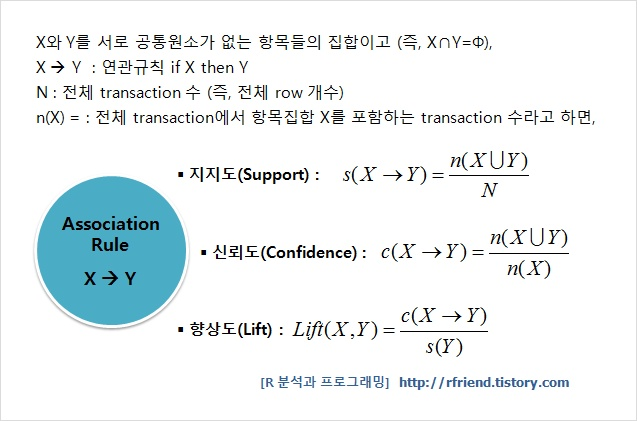

In [27]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
1,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
2,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
3,(tea),(cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
4,(coffee),(toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
5,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
6,(sandwich),(tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712
7,(tea),(sandwich),0.142631,0.071844,0.014369,0.100741,1.402222,0.004122,1.032134
8,"(coffee, bread)",(pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749
9,(pastry),"(coffee, bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033


In [28]:
rules[rules['confidence'] > 0.17]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
2,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
5,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
6,(sandwich),(tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712
10,"(coffee, tea)",(cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962


### FP tree

In [29]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets_fp = fpgrowth(hot_encoded_data, min_support=0.01, use_colnames=True)
frequent_itemsets_fp

,support,itemsets
0,0.327205,(bread)
1,0.029054,(scandinavian)
2,0.058320,(hot chocolate)
3,0.054411,(cookies)
4,0.015003,(jam)
...,...,...
56,0.019651,"(coffee, brownie)"
57,0.010777,"(brownie, bread)"
58,0.023666,"(coffee, toast)"
59,0.018067,"(coffee, scone)"


In [30]:
rules_fp = association_rules(frequent_itemsets_fp, metric='lift', min_threshold=1.4)
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
1,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
2,"(coffee, bread)",(pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749
3,(pastry),"(coffee, bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
4,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
5,(tea),(cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
6,"(coffee, tea)",(cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
7,(cake),"(coffee, tea)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
8,(sandwich),(tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712
9,(tea),(sandwich),0.142631,0.071844,0.014369,0.100741,1.402222,0.004122,1.032134


In [31]:
rules_fp[rules_fp['confidence'] > 0.17]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
4,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
6,"(coffee, tea)",(cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
8,(sandwich),(tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712
11,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582


### Apriori 알고리즘과 성능 비교

In [32]:
from mlxtend.frequent_patterns import apriori

In [33]:
# apriori
%timeit -n 100 frequent_itemsets = apriori(hot_encoded_data, min_support=0.005, use_colnames=True)

100 loops, best of 5: 82.3 ms per loop


In [34]:
# fpgrowth
%timeit -n 100 frequent_itemsets_fp = fpgrowth(hot_encoded_data, min_support=0.005, use_colnames=True)

100 loops, best of 5: 75.4 ms per loop


In [35]:
display(rules[rules['confidence'] > 0.17],rules_fp[rules_fp['confidence'] > 0.17])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
2,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
5,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
6,(sandwich),(tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712
10,"(coffee, tea)",(cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
4,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
6,"(coffee, tea)",(cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
8,(sandwich),(tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712
11,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
